In [ ]:
#!pip install google-colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Data/

Mounted at /content/drive
/content/drive/My Drive/Data


In [2]:
import os
import numpy as np, pandas as pd
from PIL import Image
import skimage

In [3]:
IMAGES_DIR = '/content/drive/My Drive/Data/test_data/en_test_images/'

labels_df_A = pd.read_csv('/content/drive/My Drive/Data/test_data/Labels_test_A.csv')
labels_df_A.head()

descriptions = {}
for row in labels_df_A.index:
  descriptions[labels_df_A.image_name.tolist()[row]] = labels_df_A.text_corrected.tolist()[row]

print(descriptions)

{'chuck_chuck_norris_meme_10.jpg': 'Some magicians can walk on water  Chuck Norris can swim through land.', 'misog_2109e457d636565e2e06dce39874c5231e1.jpg': "Me: Mom can my friend sleep over? Mom: That's fine but no boys!! Me: #GrowingUpGay", 'obama_2691536739_469698809820026_263513986_n.jpg': 'THIS GUY INHERITED A MESS. DID HE WHINE ABOUT IT? NO HE FOXED THINGS. THIS GUY...NOT SO MUCH . FORAMERICA', 'kim_threat-kim-jong-un-allegedly-working-on-multiple-attack-missiles-36036632.png': "THREAT: Kim Jong Un allegedly working on multiple attack missiles wee woo wee woo wee woo.. IG:PolarSaurusRex Update: reports say Kim Jong Un's missiles could have been deployed DEWO So what year do y'all think ww3 will take place", 'big_bang_cfe5c1d4d28c66694e01996f6ed2e70765b442c958e94178ee32f0b47d8497ec.jpg': 'YOU CANT-RUIN A FRIENDSHIP WITH SEX  THATS LIKE TRYING TO RUIN ICECREAM WITH SPRINKLE Q & A', 'misog_217images-12.jpg': 'GOES ON A DATE WITH OVERLY ATTACHED GIRLFRIEND', 'bean_21stv8.jpg': '2018 

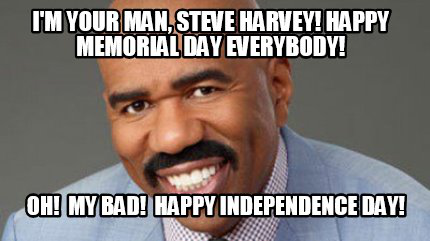

In [5]:
images = [filename for filename in os.listdir(IMAGES_DIR)]
image = Image.open(os.path.join(IMAGES_DIR, images[0])).convert("RGB")
image

In [7]:
pd.DataFrame(images).to_csv('test_order.csv', index=False)

In [5]:
images[0]

'harvey_4082494.jpg'

In [6]:
descriptions[images[0]]

"I'M YOUR MAN.STEVE HARVEY! HAPPY MEMORIAL DAY EVERYBODY! OH! MY BAD! HAPPY INDEPENDENCE DAY!"

In [7]:
os.path.join(IMAGES_DIR, images[0])

'/content/drive/My Drive/Data/test_data/en_test_images/harvey_4082494.jpg'

In [8]:
#img =Image.open(os.path.join(IMAGES_DIR, images[0])).convert("RGB")
img = open(os.path.join(IMAGES_DIR, images[140]), "rb")
img

<_io.BufferedReader name='/content/drive/My Drive/Data/test_data/en_test_images/racis_100a16016420b9fa97fc38181a85bda27c338f6d75bf06f4585103bdd6c3865532e_1.jpg'>

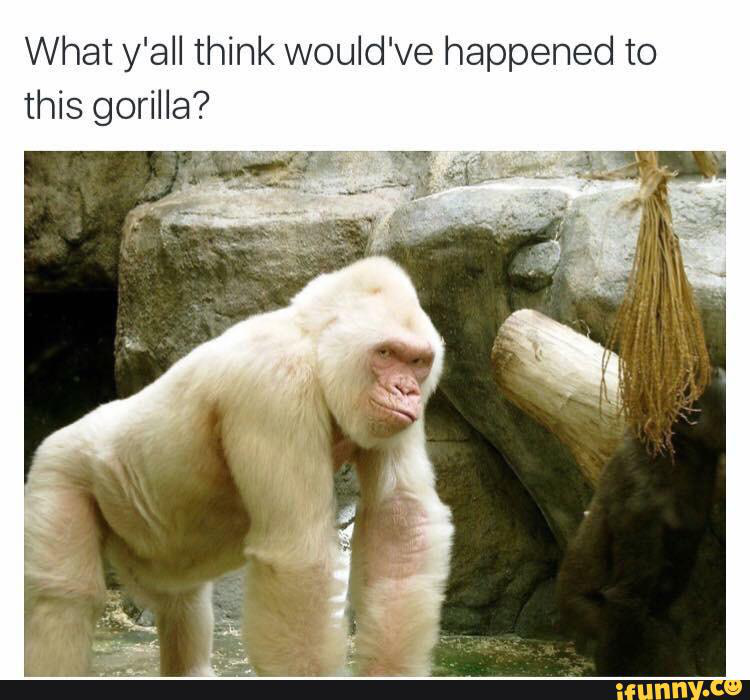

In [9]:
Image.open(os.path.join(IMAGES_DIR, images[140])).convert("RGB")

In [10]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 31.9 MB/s 
     |████████████████████████████████| 120 kB 72.8 MB/s 
     |████████████████████████████████| 6.6 MB 53.3 MB/s 


In [11]:
file_paths = [os.path.join(IMAGES_DIR, x) for x in os.listdir(IMAGES_DIR)]
file_paths

['/content/drive/My Drive/Data/test_data/en_test_images/harvey_4082494.jpg',
 '/content/drive/My Drive/Data/test_data/en_test_images/feminist_tequilafunrise3.jpg',
 '/content/drive/My Drive/Data/test_data/en_test_images/chuck_955fd3b0fcf8d5b1475eb0b3d4f48dbc0ccfc121345b2a9ec8ea26083bfc1bd9.jpg',
 '/content/drive/My Drive/Data/test_data/en_test_images/country_club-giggles-memes-that-are-sweeping-the-country-13191.jpg',
 '/content/drive/My Drive/Data/test_data/en_test_images/liam_30bg37.jpg',
 '/content/drive/My Drive/Data/test_data/en_test_images/x_men_75534b704af18f152a8a958a59d7595c.jpg',
 '/content/drive/My Drive/Data/test_data/en_test_images/gf_college-relationship.jpg',
 '/content/drive/My Drive/Data/test_data/en_test_images/minion_meme1.jpg',
 '/content/drive/My Drive/Data/test_data/en_test_images/spiderman_115.jpg',
 '/content/drive/My Drive/Data/test_data/en_test_images/distracted_bf_bf-meme-lead.jpg',
 '/content/drive/My Drive/Data/test_data/en_test_images/chuck_Chuck-Norris-Ca

In [12]:
import torch
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer

In [13]:
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTFeatureExtractor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0): ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, 

In [14]:
max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}
def predict_step(image_paths):
  images = []
  for image_path in image_paths:
    #print('Processing Image:', image_path)
    try:
        i_image = Image.open(image_path)
        if i_image.mode != "RGB":
          i_image = i_image.convert(mode="RGB")

        images.append(i_image)
    except:
      print(i_image, "is corrupt.")
    
    pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
    pixel_values = pixel_values.to(device)

    output_ids = model.generate(pixel_values, **gen_kwargs)

    preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
    preds = [pred.strip() for pred in preds]
    ret_list = [preds, [i.split('/')[-1] for i in image_paths]]
    req_list = []
    for i in range(0, len(ret_list[0])):
      req_list.append([ret_list[0][i], ret_list[1][i]])
  return req_list

file_paths = [os.path.join(IMAGES_DIR, x) for x in os.listdir(IMAGES_DIR)]


In [18]:
len(file_paths)/8

187.0

In [19]:
file_paths[1495]

'/content/drive/My Drive/Data/test_data/en_test_images/country_17f7382ecfb7ad42b0bbc7ba8d40d506--country-music-meme-country-quotes.jpg'

In [20]:
list(range(0, len(file_paths), 8))[-10:]

[1416, 1424, 1432, 1440, 1448, 1456, 1464, 1472, 1480, 1488]

In [21]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [22]:
for i in range(0, len(file_paths), 8):
    prediction_batch = predict_step(file_paths[i:i+8])
    pred_df = pd.DataFrame(prediction_batch, columns=['caption', 'image'])
    print('Running batch', str(i), 'to', str(i+8))
    print(pred_df.head(2))
    print("##########################\n")
    output_path='/content/drive/My Drive/Data/test_data/test_image_captions.csv'
    pred_df.to_csv(output_path, mode='a', header=not os.path.exists(output_path), index=False)

Running batch 0 to 8
                                    caption                         image
0                   a man in a suit and tie            harvey_4082494.jpg
1  a person holding a blue and white object  feminist_tequilafunrise3.jpg
##########################

Running batch 8 to 16
                                         caption  \
0    a painting of a cartoon character on a wall   
1  a man and a woman standing next to each other   

                            image  
0               spiderman_115.jpg  
1  distracted_bf_bf-meme-lead.jpg  
##########################

Running batch 16 to 24
                                         caption  \
0        a man in a suit talking on a cell phone   
1  a collage of photos of a man in a black shirt   

                                        image  
0              stevejobs_Do_ffe15b_807049.jpg  
1  joker_c3a7a49de27b62a539ee9c50b41c9e39.jpg  
##########################

Running batch 24 to 32
                                       

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Running batch 64 to 72
                                          caption  \
0  a large building with a sign on the side of it   
1               a cartoon of a bear and a penguin   

                                               image  
0  liam_whats-next-liam-nissan-harrison-ford-2773...  
1  putin_54511476_495316997667311_287262304162297...  
##########################

Running batch 72 to 80
                                        caption             image
0        a man is holding a carrot in his mouth    jim_2hlgee.jpg
1  a drawing of a penguin on top of a newspaper  pepe_JpHicSW.jpg
##########################

Running batch 80 to 88
                                            caption  \
0        a collage of photos of people in a kitchen   
1  a statue of a penguin sitting on top of a toilet   

                                               image  
0  chandler_47690845_851514845179561_482060209150...  
1  penguin_trying-to-figure-out-how-to-farm-karma...  
#####################

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Running batch 1392 to 1400
                                             caption                  image
0         a man in a suit and tie sitting in a chair   godfather_2xhx1u.jpg
1  a man and a woman standing in front of a group...  distracted_bf_100.jpg
##########################

Running batch 1400 to 1408
                                             caption  \
0  two pictures of a woman in a dress and a man i...   
1      a man sitting on a couch playing a video game   

                                               image  
0  friends_Screen_Shot_2018-03-04_at_8.59.07_AM_p...  
1            gf_jameslileks_1358448018_tumblrmnn.jpg  
##########################

Running batch 1408 to 1416
                                             caption               image
0  a man in a baseball uniform holding a baseball...  sports_guy-nba.png
1  a painting of a woman performing a trick on a ...       friends_8.jpg
##########################

Running batch 1416 to 1424
                           